In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime

In [3]:
wake_county = "Wake_Property_2019_06/Wake_Property_2019_06.shp"
wake_county_df = gp.read_file(wake_county)
wake_county_df.columns.values

array(['PIN_NUM', 'PARCEL_PK', 'CALC_AREA', 'REID', 'MAP_NAME', 'OWNER',
       'ADDR1', 'ADDR2', 'ADDR3', 'DEED_BOOK', 'DEED_PAGE', 'DEED_DATE',
       'DEED_ACRES', 'BLDG_VAL', 'LAND_VAL', 'TOTVALASSD', 'BILLCLASS',
       'BILLCLDECO', 'PROPDESC', 'HEATEDAREA', 'STNAME', 'STYPE', 'STPRE',
       'STSUF', 'STNUM', 'STMISC', 'SITEADDR', 'FULLSTNAME', 'CITY',
       'CITYDECODE', 'PLAN_JURIS', 'TOWNSHIP', 'TWNSHPCODE', 'FIREDIST',
       'YEAR_BUILT', 'TOTSALPRIC', 'SALE_DATE', 'TYPEANDUSE', 'TYPEDECODE',
       'DESIGNSTYL', 'DESIGNDECO', 'UNITS', 'LANDCODE', 'LAND_CLASS',
       'LANDDECODE', 'EXEMPTDESC', 'EXEMPTSTAT', 'OWNERSHIP', 'ACTIVITY',
       'FUNCTION', 'STRUCTURE', 'SITE', 'TOTSTRUCTS', 'TOTUNITS',
       'OLDPRCNUM', 'ZIPNUM', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'], dtype=object)

In [4]:
KEYS = [
    "UNITS",
    "HEATEDAREA",
    "YEAR_BUILT",
    "ADDR1",
    "ADDR2",
    "ADDR3",
    "SALE_DATE",
    "TOTSALPRIC",
    "ACTIVITY",
    "TYPEANDUSE",
    "SITEADDR",
    "CITYDECODE",
]

TYPE_AND_USE = [
    "02", #Duplex
    "03", #Tri
    "04", #Quad
    "05", #Multi
    "07", #Garden Apartment
    "08", #WalkUp/Townhouse Apartment
    "09", #Elevator Apartment
]

states = [
    " AL ",
    " AK ",
    " AZ ",
    " AR ",
    " CA ",
    " CO ",
    " CT ",
    " DE ",
    " FL ",
    " GA ",
    " HI ",
    " ID ",
    " IL ",
    " IN ",
    " IA ",
    " KS ",
    " KY ",
    " LA ",
    " ME ",
    " MD ",
    " MA ",
    " MI ",
    " MN ",
    " MS ",
    " MO ",
    " MT ",
    " NE ",
    " NV ",
    " NH ",
    " NJ ",
    " NM ",
    " NY ",
    " NC ",
    " ND ",
    " OH ",
    " OK ",
    " OR ",
    " PA ",
    " RI ",
    " SC ",
    " SD ",
    " TN ",
    " TX ",
    " UT ",
    " VT ",
    " VA ",
    " WA ",
    " WV ",
    " WI ",
    " WY ",
    " DC ",
]

def get_state(x):
    for state in states:
        if state in x:
            return(state.strip())
    return "N/A"

def text_to_date(x):
    if x is not None:
        return datetime.strptime(x,"%Y-%m-%d")
    return datetime(2100,1,1)

def datetime_year(x):
    return x.year
    

In [121]:
Ca_Props

,UNITS,HEATEDAREA,YEAR_BUILT,ADDR1,ADDR2,ADDR3,SALE_DATE,TOTSALPRIC,ACTIVITY,TYPEANDUSE,SITEADDR,CITYDECODE,ADDR,STATE,SALE_DATE_DT,SALE_DATE_YEAR
107,2.0,1984.0,2006,4757 CANOGA AVE,WOODLAND HILLS CA 91364-4442,,2007-03-01,195000.0,1100,02,1122 SUMMERKINGS CT,RALEIGH,WOODLAND HILLS CA 91364-4442,CA,2007-03-01,2007
7371,4.0,4274.0,1979,SHU NAY TANG,1196 RATHMOOR ST,EL CAJON CA 92020-7779,2016-05-31,305000.0,1100,04,4216 GREENCASTLE CT,RALEIGH,1196 RATHMOOR STEL CAJON CA 92020-7779,CA,2016-05-31,2016
18842,2.0,1984.0,2006,1095 ORTEGA CIR,GILROY CA 95020-5315,,2006-08-31,189000.0,1100,02,1114 SUMMERKINGS CT,RALEIGH,GILROY CA 95020-5315,CA,2006-08-31,2006
29390,2.0,2551.0,1979,20201 SW BIRCH ST,NEWPORT BEACH CA 92660-1751,,2018-07-26,310000.0,1100,02,4504 N NEW HOPE RD,RALEIGH,NEWPORT BEACH CA 92660-1751,CA,2018-07-26,2018
48189,2.0,1984.0,2007,1410 EL SOLYO AVE,CAMPBELL CA 95008-3310,,2016-12-28,195000.0,1100,02,1126 SUMMERKINGS CT,RALEIGH,CAMPBELL CA 95008-3310,CA,2016-12-28,2016
52451,4.0,4144.0,1984,1 WHISPERING WIND,IRVINE CA 92614-5425,,2018-03-20,500.0,1100,04,4412 BROCKTON DR,RALEIGH,IRVINE CA 92614-5425,CA,2018-03-20,2018
59397,2.0,2546.0,1983,2382 NIGHT SHADE LN,FREMONT CA 94539-6524,,2011-04-08,152000.0,1100,02,5641 THEA LN,RALEIGH,FREMONT CA 94539-6524,CA,2011-04-08,2011
62193,4.0,4192.0,1983,950 MONROE ST,SANTA CLARA CA 95050-4809,,2018-11-07,380000.0,1100,04,4628 KILCULLEN DR,RALEIGH,SANTA CLARA CA 95050-4809,CA,2018-11-07,2018
71453,3.0,3132.0,1980,1871 TIFFIN RD,OAKLAND CA 94602-1813,,2018-03-21,420000.0,1100,03,8715 CHAPEL HILL RD,CARY,OAKLAND CA 94602-1813,CA,2018-03-21,2018
79607,4.0,2444.0,1983,20052 LAWSON LN,HUNTINGTON BEACH CA 92646-4921,,2013-11-01,133000.0,1100,04,709 PEACH RD,RALEIGH,HUNTINGTON BEACH CA 92646-4921,CA,2013-11-01,2013


In [5]:
parcels = wake_county_df[wake_county_df["UNITS"]>1][wake_county_df["UNITS"]<=4][wake_county_df["TYPEANDUSE"].isin(TYPE_AND_USE)][KEYS]
parcels["ADDR3"] = parcels["ADDR3"].apply(lambda x: "" if x==None else x)
parcels["ADDR"] = parcels["ADDR2"] + parcels["ADDR3"]
parcels["STATE"] = parcels["ADDR"].apply(get_state)
parcels["SALE_DATE_DT"] = parcels["SALE_DATE"].apply(text_to_date)
parcels["SALE_DATE_YEAR"] = parcels["SALE_DATE_DT"].apply(datetime_year)
Ca_Props = parcels[parcels["YEAR_BUILT"]>0][parcels["STATE"]=="CA"][parcels["SALE_DATE_DT"]<=datetime(2019,6,7)]
CaPropsSaleYears = parcels[parcels["YEAR_BUILT"]>0][parcels["STATE"]=="CA"][parcels["SALE_DATE_DT"]<=datetime(2019,6,7)].groupby("SALE_DATE_YEAR").size().reset_index(name="counts").sort_values("SALE_DATE_YEAR")
CaPropsSaleYears = pd.DataFrame({"SALE_DATE_YEAR":(np.arange(1985, 2020, step=1))}).merge(CaPropsSaleYears, how='outer', 
            left_on='SALE_DATE_YEAR', right_on='SALE_DATE_YEAR')
CaPropsSaleYears["counts"] = CaPropsSaleYears["counts"].fillna(0)

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [33]:
sfr_parcels = wake_county_df[wake_county_df["UNITS"]==1][KEYS]
sfr_parcels["SALE_DATE_DT"] = sfr_parcels["SALE_DATE"].apply(text_to_date)
sfr_parcels["SALE_DATE_YEAR"] = sfr_parcels["SALE_DATE_DT"].apply(datetime_year)
sfr_parcels_new = sfr_parcels[sfr_parcels["SALE_DATE_YEAR"]>=2010][sfr_parcels["YEAR_BUILT"]>=2010][
    sfr_parcels["HEATEDAREA"]>0][sfr_parcels["TOTSALPRIC"]>0]
# sfr_parcels_new.groupby("YEAR_BUILT").size().reset_index(name="counts")
sfr_parcels_new["CostPerSqFt"] = sfr_parcels_new["TOTSALPRIC"]/sfr_parcels_new["HEATEDAREA"]
cost_per_sqft_sfr = sfr_parcels_new.groupby("YEAR_BUILT").agg("mean")[["CostPerSqFt","SALE_DATE_YEAR"]].reset_index().merge(sfr_parcels_new.groupby("YEAR_BUILT").size().reset_index(name="Sample Size"),on="YEAR_BUILT")

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [98]:
Ca_Props.groupby("SALE_DATE_YEAR").size().reset_index(name="Sample_Size")
Ca_Props_price_by_year = Ca_Props.groupby("SALE_DATE_YEAR").agg("mean")[["TOTSALPRIC","UNITS"]].reset_index()
Ca_Props_price_by_year["Cost_per_Unit"] = Ca_Props_price_by_year["TOTSALPRIC"]/Ca_Props_price_by_year["UNITS"]
Ca_Props_price_by_year = Ca_Props_price_by_year[Ca_Props_price_by_year["SALE_DATE_YEAR"]>=2013].merge(Ca_Props.groupby("SALE_DATE_YEAR").size().reset_index(name="Sample_Size"),on="SALE_DATE_YEAR",how ="left")

In [100]:
parcels = wake_county_df[wake_county_df["UNITS"]>1][wake_county_df["UNITS"]<=4][wake_county_df["TYPEANDUSE"].isin(TYPE_AND_USE)][KEYS]
parcels["ADDR3"] = parcels["ADDR3"].apply(lambda x: "" if x==None else x)
parcels["ADDR"] = parcels["ADDR2"] + parcels["ADDR3"]
parcels["STATE"] = parcels["ADDR"].apply(get_state)
parcels["SALE_DATE_DT"] = parcels["SALE_DATE"].apply(text_to_date)
parcels["SALE_DATE_YEAR"] = parcels["SALE_DATE_DT"].apply(datetime_year)
NC_Props = parcels[parcels["YEAR_BUILT"]>0][parcels["STATE"]=="NC"][parcels["SALE_DATE_DT"]<=datetime(2019,6,7)]
NCPropsSaleYears = parcels[parcels["YEAR_BUILT"]>0][parcels["STATE"]=="NC"][parcels["SALE_DATE_DT"]<=datetime(2019,6,7)].groupby("SALE_DATE_YEAR").size().reset_index(name="counts").sort_values("SALE_DATE_YEAR")
NCPropsSaleYears = pd.DataFrame({"SALE_DATE_YEAR":(np.arange(1985, 2020, step=1))}).merge(NCPropsSaleYears, how='outer', 
            left_on='SALE_DATE_YEAR', right_on='SALE_DATE_YEAR')
NCPropsSaleYears["counts"] = NCPropsSaleYears["counts"].fillna(0)
NC_Props.groupby("SALE_DATE_YEAR").size().reset_index(name="Sample_Size")
NC_Props_price_by_year = NC_Props.groupby("SALE_DATE_YEAR").agg("mean")[["TOTSALPRIC","UNITS"]].reset_index()
NC_Props_price_by_year["Cost_per_Unit"] = NC_Props_price_by_year["TOTSALPRIC"]/NC_Props_price_by_year["UNITS"]
NC_Props_price_by_year = NC_Props_price_by_year[NC_Props_price_by_year["SALE_DATE_YEAR"]>=2010].merge(NC_Props.groupby("SALE_DATE_YEAR").size().reset_index(name="Sample_Size"),on="SALE_DATE_YEAR",how ="left")

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [115]:
Ca_Props_price_by_year = Ca_Props_price_by_year.rename(index=str, columns={"Cost_per_Unit": "Cost_per_Unit_CA",})
NC_Props_price_by_year = NC_Props_price_by_year.rename(index=str, columns={"Cost_per_Unit": "Cost_per_Unit_NC",})

Cost_per_unit_compare = Ca_Props_price_by_year[["SALE_DATE_YEAR","Cost_per_Unit_CA","Sample_Size"]].merge(NC_Props_price_by_year[["SALE_DATE_YEAR","Cost_per_Unit_NC","Sample_Size"]], on="SALE_DATE_YEAR")
Cost_per_unit_compare

,SALE_DATE_YEAR,Cost_per_Unit_CA,Sample_Size_x,Cost_per_Unit_NC,Sample_Size_y
0,2013,33250.000000,1,66100.873362,90
1,2014,78750.000000,2,84841.333333,87
2,2015,75250.000000,3,84170.300752,108
3,2016,81875.000000,3,83904.851852,136
4,2017,90156.250000,6,86097.415507,176
5,2018,103951.219512,12,107740.065147,116
6,2019,125714.285714,4,128384.060870,50


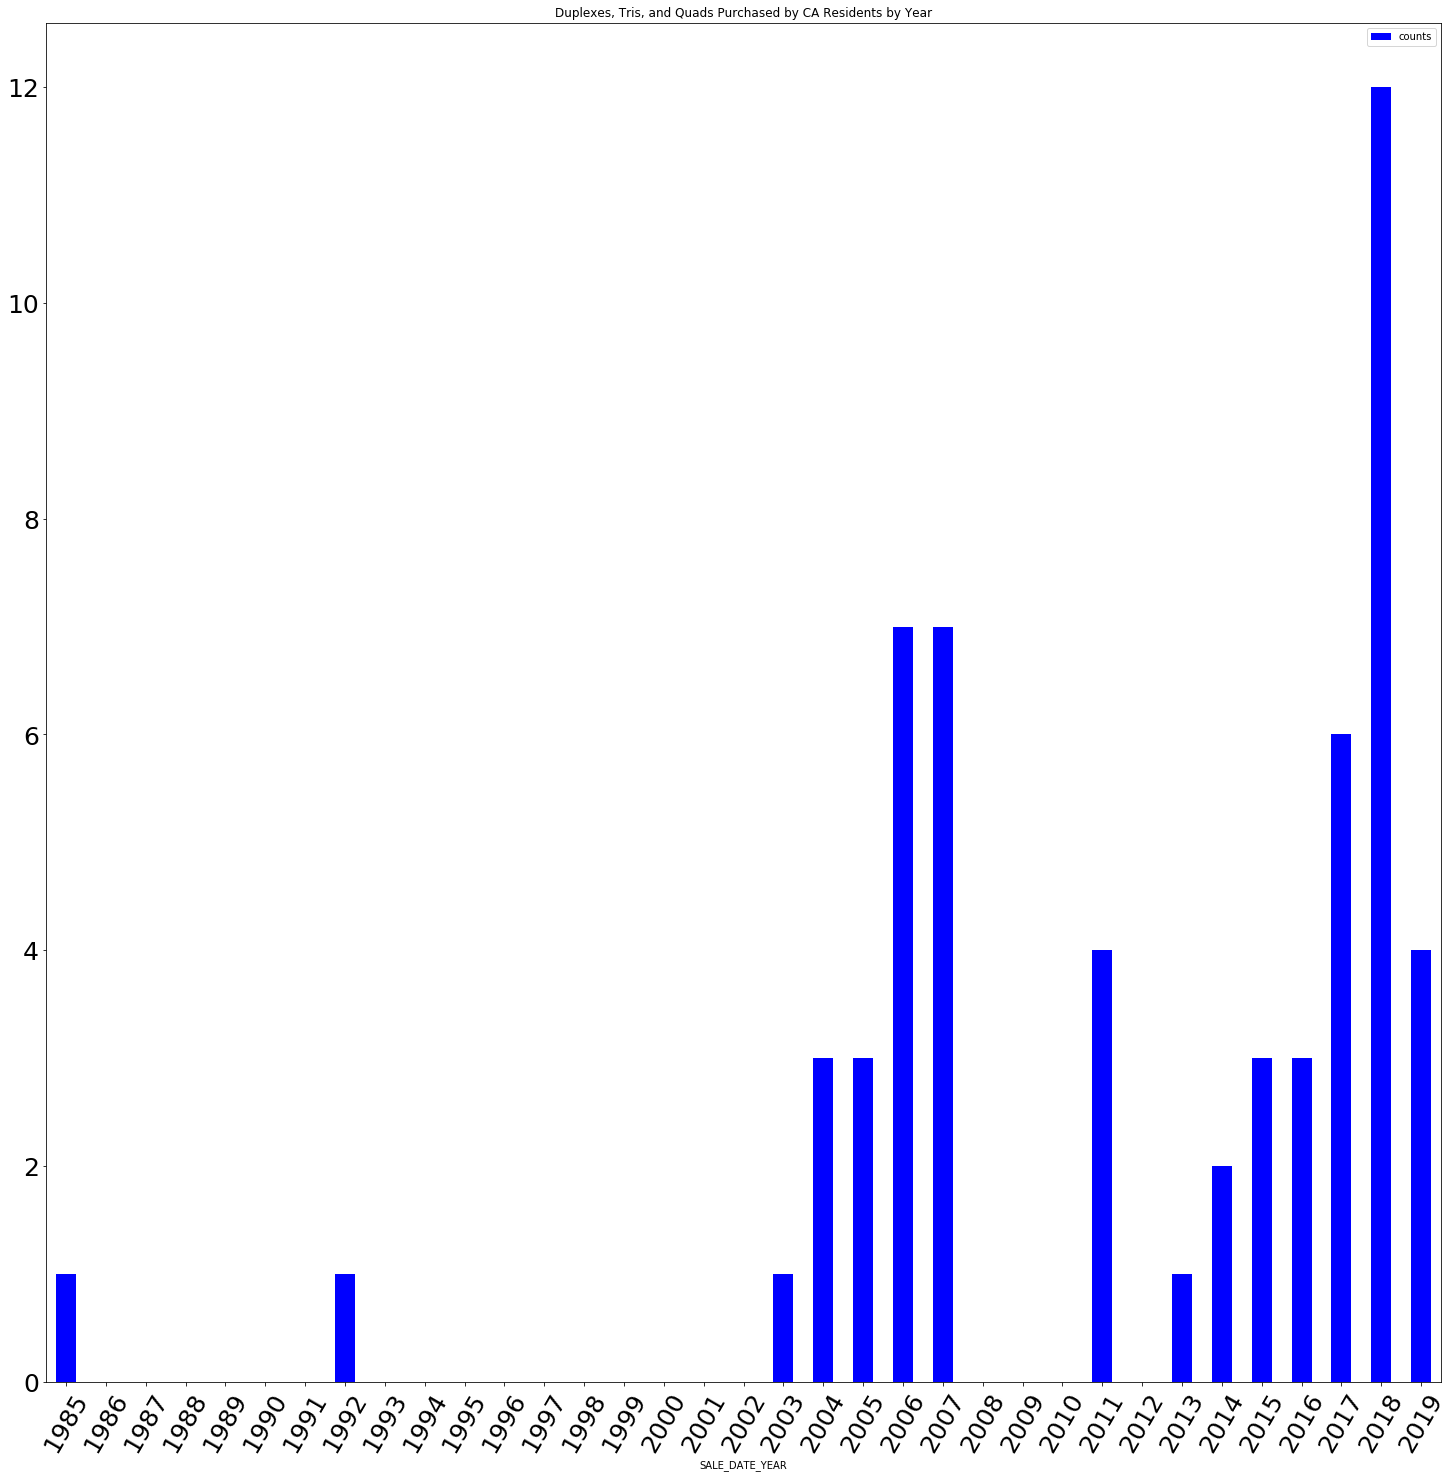

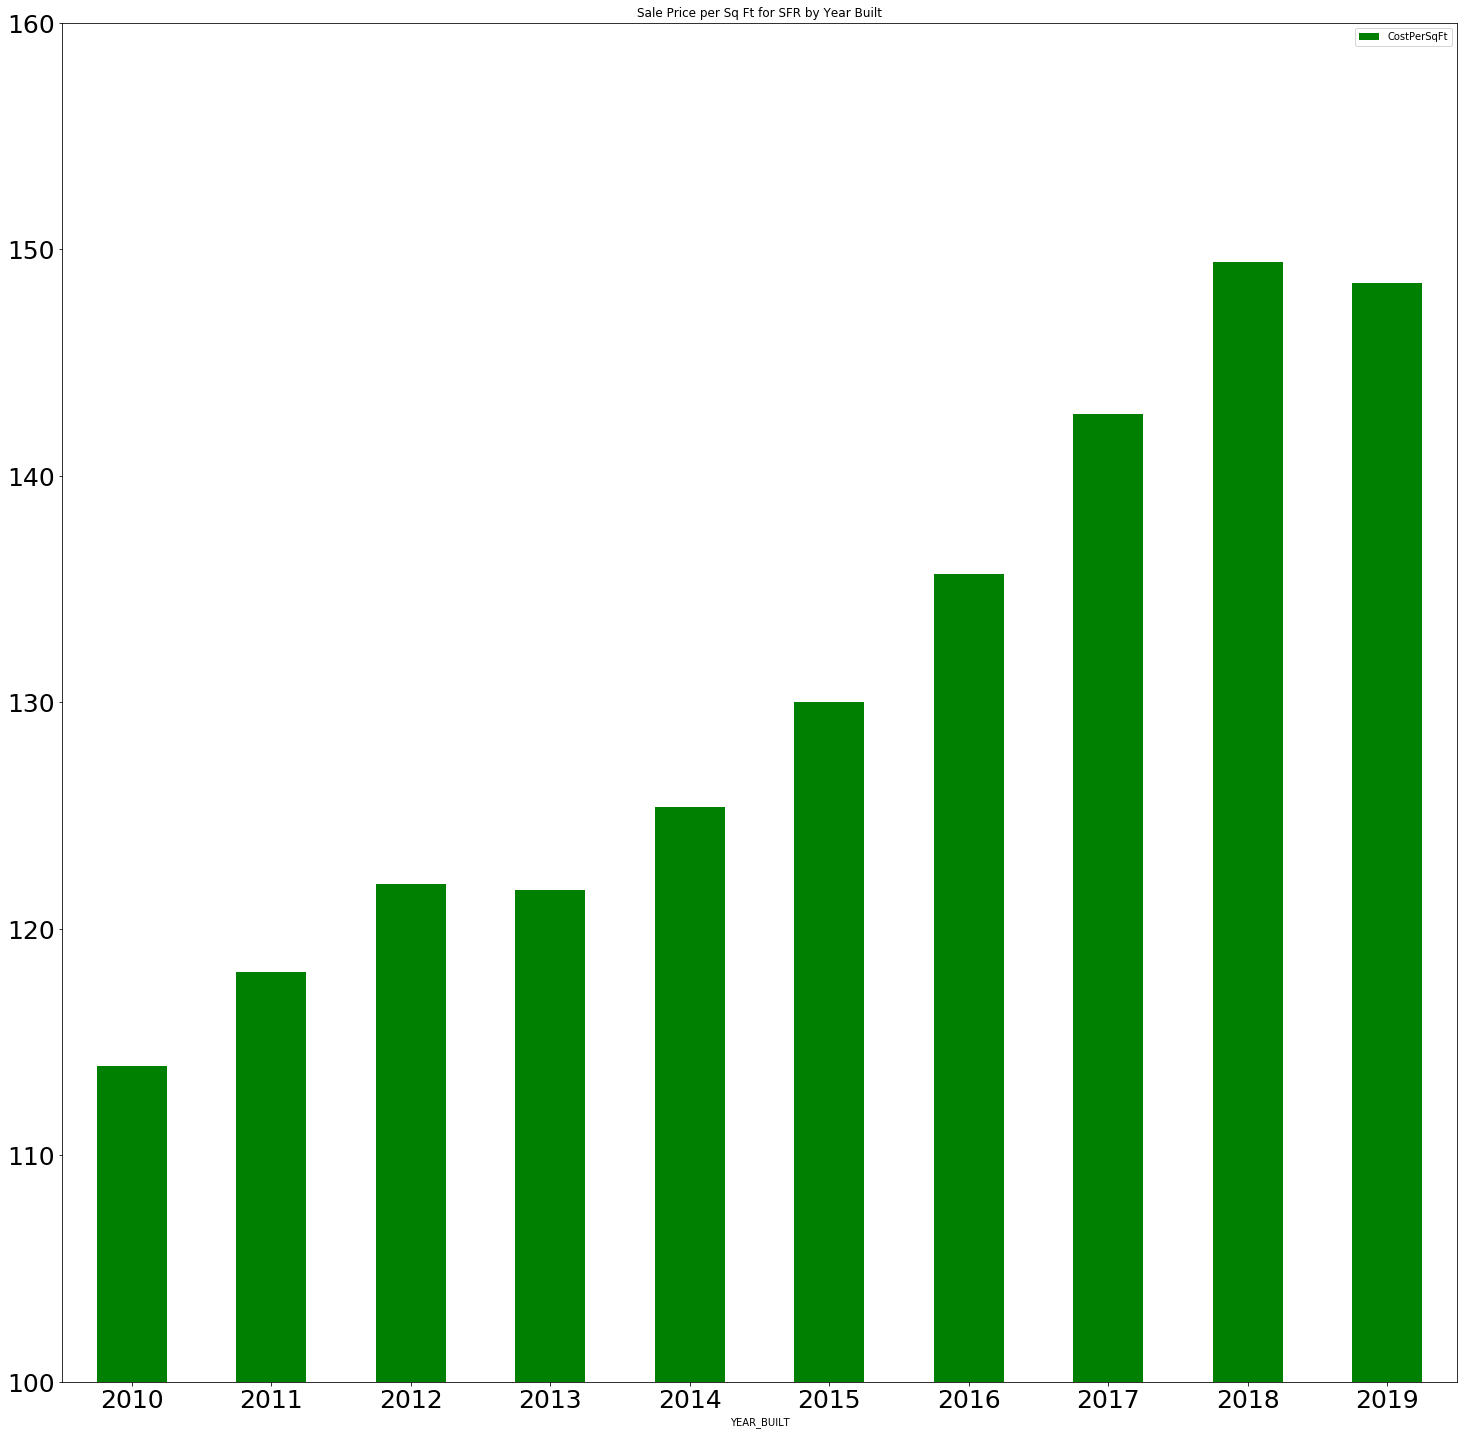

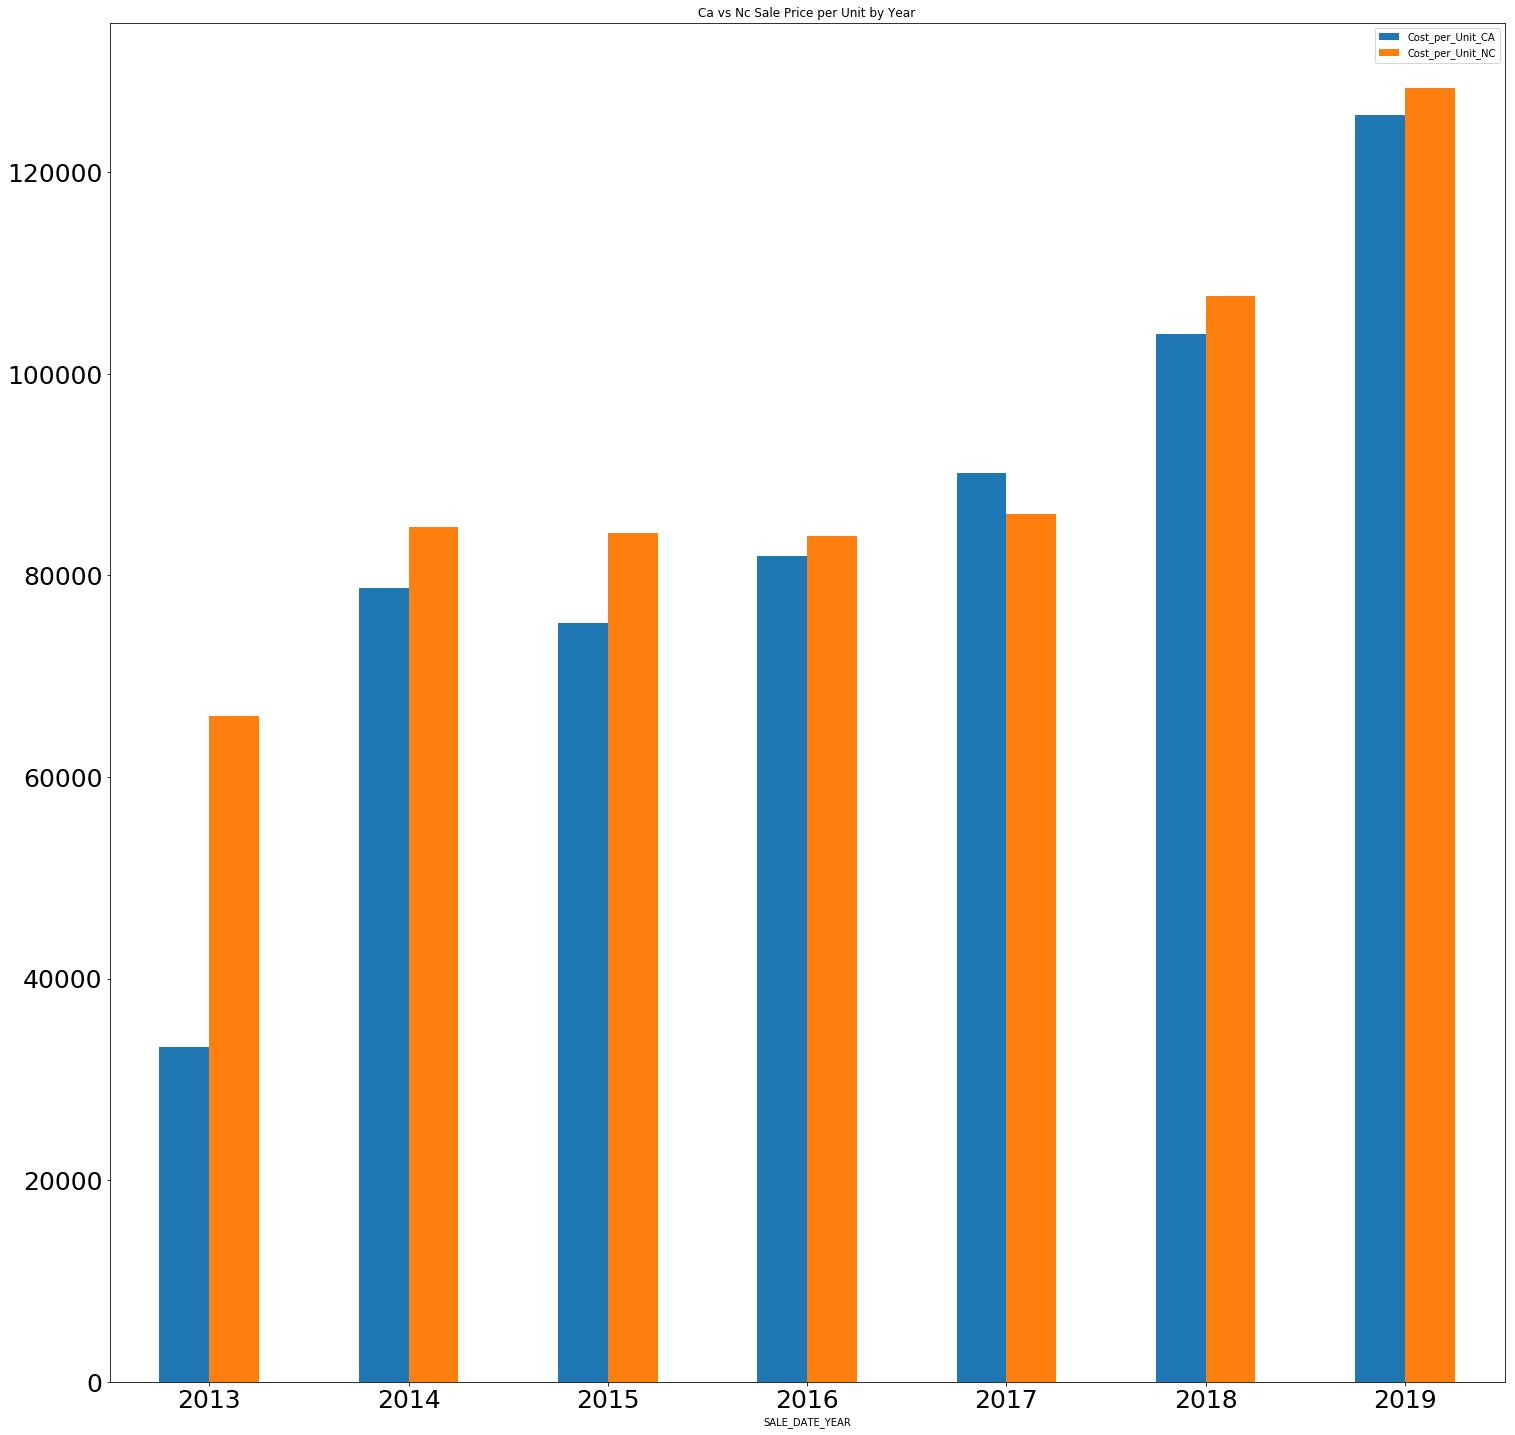

In [117]:
unit_type=2

# parcels[parcels["YEAR_BUILT"]>0][parcels["UNITS"]==unit_type].groupby("YEAR_BUILT").size().reset_index(name="counts").plot.bar(
#     x = "YEAR_BUILT",
#     y = "counts",
#     figsize=(25,25),
#     color="blue",
#     fontsize = 18,
# )

# parcels[parcels["YEAR_BUILT"]>0][parcels["UNITS"]==unit_type].groupby("STATE").size().reset_index(name="counts").sort_values("counts", ascending=False).plot.bar(
#     x = "STATE",
#     y = "counts",
#     figsize=(25,25),
#     color="blue",
#     fontsize = 25,
# )

CaPropsSaleYears.plot.bar(
    x = "SALE_DATE_YEAR",
    y = "counts",
    figsize=(25,25),
    color="blue",
    fontsize = 25,
    title = "Duplexes, Tris, and Quads Purchased by CA Residents by Year",
    rot = 60
)

cost_per_sqft_sfr.plot.bar(
    x = "YEAR_BUILT",
    y = "CostPerSqFt",
    figsize=(25,25),
    color="green",
    fontsize = 25,
    title = "Sale Price per Sq Ft for SFR by Year Built",
    rot = 0,
    ylim = (100,160),
)

Cost_per_unit_compare.plot(
    x="SALE_DATE_YEAR",
    y=["Cost_per_Unit_CA","Cost_per_Unit_NC"],
    kind='bar', 
    figsize=(25,25),
    fontsize = 25,
    title = "Ca vs Nc Sale Price per Unit by Year",
    rot = 0,
)


# plt.savefig("Cost_per_unit_CA_vs_NC.jpg", dpi=300)

plt.show()